In [35]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
Iris=pd.read_csv('Iris(1).csv')
Iris.sample(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
151,152,NaN,NaN,NaN,1.8,Iris-virginica
26,27,5.0,3.4,1.6,0.4,Iris-setosa
17,18,5.1,3.5,1.4,0.3,Iris-setosa
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
35,36,5.0,3.2,1.2,0.2,Iris-setosa
148,149,6.2,3.4,5.4,2.3,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [37]:
Iris.fillna(Iris.median(),inplace=True)
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,Iris-setosa
1,2,4.9,3.0,1.40,0.2,Iris-setosa
2,3,4.7,3.2,1.30,0.2,Iris-setosa
3,4,4.6,3.1,1.50,0.2,Iris-setosa
4,5,5.0,3.6,1.40,0.2,Iris-setosa
5,6,5.4,3.9,1.70,0.4,Iris-setosa
6,7,4.6,3.4,1.40,0.3,Iris-setosa
7,8,5.0,3.4,1.50,0.2,Iris-setosa
8,9,4.4,2.9,1.40,0.2,Iris-setosa
9,10,4.9,3.1,1.50,0.1,Iris-setosa


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [7]:
Iris["Species"].value_counts()

Iris-virginica     52
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

Iris.Species[Iris.Species == "Iris-virginica"] = 0 
Iris.Species[Iris.Species == "Iris-setosa"] = 1 
Iris.Species[Iris.Species == "Iris-versicolor"] = 2
Iris

In [24]:
cleanup_nums = {"Species":  {"Iris-virginica": 0, "Iris-setosa": 1 , "Iris-versicolor": 2 }}
Iris.replace(cleanup_nums, inplace=True)
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,1
1,2,4.9,3.0,1.40,0.2,1
2,3,4.7,3.2,1.30,0.2,1
3,4,4.6,3.1,1.50,0.2,1
4,5,5.0,3.6,1.40,0.2,1
5,6,5.4,3.9,1.70,0.4,1
6,7,4.6,3.4,1.40,0.3,1
7,8,5.0,3.4,1.50,0.2,1
8,9,4.4,2.9,1.40,0.2,1
9,10,4.9,3.1,1.50,0.1,1


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [25]:
Iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.702734,-0.392693,0.872346,0.890676
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [28]:
Iris.var()

Id               1938.000000
SepalLengthCm       0.681143
SepalWidthCm        0.188004
PetalLengthCm       3.113179
PetalWidthCm        0.580926
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

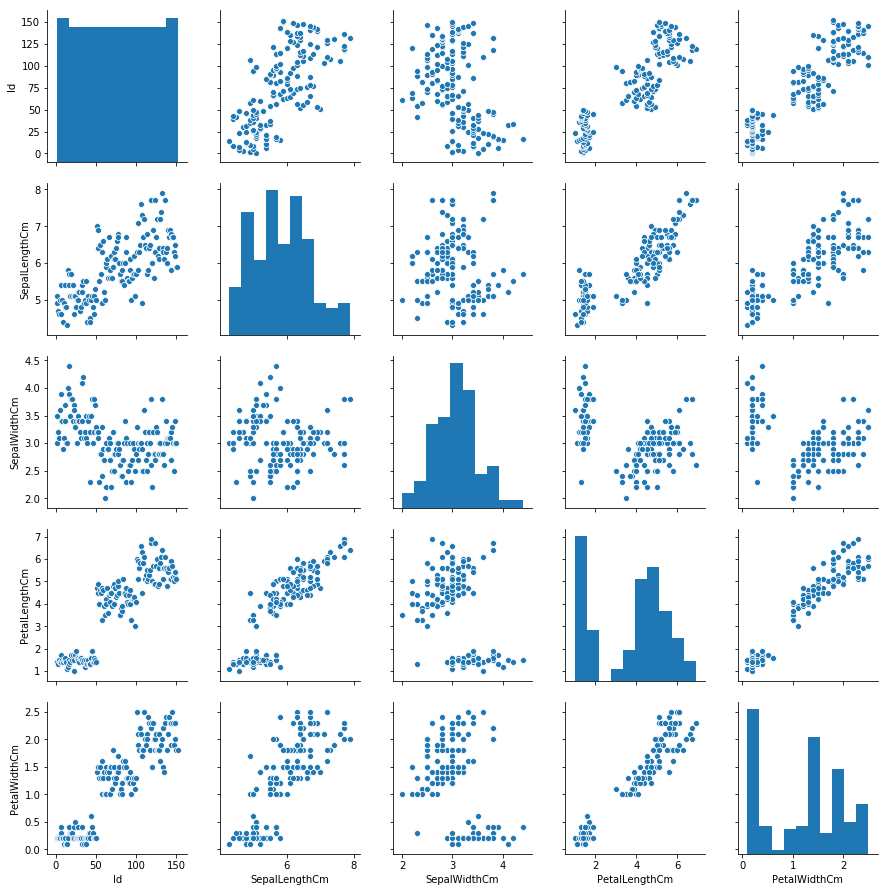

In [27]:
sns.pairplot(Iris)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [44]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(Iris, train_size=0.8)
training

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
151,152,5.8,3.0,4.35,1.8,Iris-virginica
143,144,6.8,3.2,5.90,2.3,Iris-virginica
63,64,6.1,2.9,4.70,1.4,Iris-versicolor
14,15,5.8,4.0,1.20,0.2,Iris-setosa
22,23,4.6,3.6,1.00,0.2,Iris-setosa
128,129,6.4,2.8,5.60,2.1,Iris-virginica
12,13,4.8,3.0,1.40,0.1,Iris-setosa
35,36,5.0,3.2,1.20,0.2,Iris-setosa
142,143,5.8,2.7,5.10,1.9,Iris-virginica
62,63,6.0,2.2,4.00,1.0,Iris-versicolor


In [46]:
#Split in x and y dataset , y = target
y=Iris.Species
x=Iris.drop(["Id","Species"],axis=1)

In [47]:
# split datasets in 80-20 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [48]:
# 80% in training dataset
x_train.shape

(121, 4)

In [49]:
# 20% in training dataset
x_test.shape

(31, 4)

In [50]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
63,6.1,2.9,4.7,1.4
26,5.0,3.4,1.6,0.4
123,6.3,2.7,4.9,1.8
0,5.1,3.5,1.4,0.2
86,6.7,3.1,4.7,1.5
105,7.6,3.0,6.6,2.1
38,4.4,3.0,1.3,0.2
87,6.3,2.3,4.4,1.3
116,6.5,3.0,5.5,1.8
72,6.3,2.5,4.9,1.5


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [0]:
df_z = dev_pv.apply(zscore)
df_z.shape

## Question 9 - Finding Optimal value of k.

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Miss classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

### Question 11: Read the data given in bc2.csv file

In [58]:
bc2=pd.read_csv('bc2.csv')
bc2

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Question 12: Observe the no.of records in dataset and type of each feature 

In [60]:
bc2.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [62]:
bc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 13: Use summary statistics to check if missing values, outlier and encoding treament is necessary

### Check Missing Values

### Question 14: Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

### Question 15: Find the distribution of target variable (Class) 

#### Plot the distribution of target variable using histogram

### convert the datatype of Bare Nuclei to `int`

### Question 16: Standardization of Data

### Question 17: Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

### Question 18: Divide the dataset into feature set and target set

### Divide the Training and Test sets in 70:30 

## Question 19 - Finding Optimal value of k

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

### Question 20: Print the optimal number of neighbors